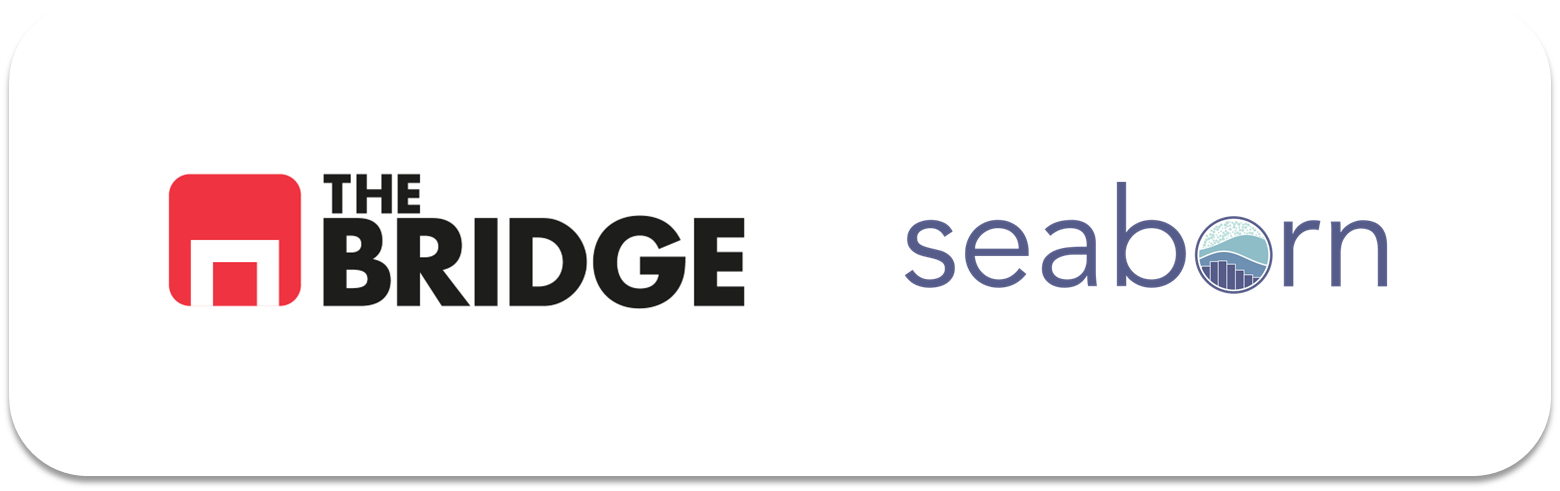

## PRACTICA OBLIGATORIA: **Visualización Avanzada y Presentación**

* La práctica obligatoria de esta unidad se divide en dos partes, una dedicada a visualización y construcción de funciones, y la otra a hacer una presentación de resultados. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.mode.copy_on_write = True # CoW por defecto a partir de pandas 3.0.0

## #1: Visualización

### #1.1

Carga el dataset de las ciudades de California que está en la ruta "./data/california_cities.csv". Muestra su contenido, deshazte de las filas con nulos.

In [50]:
df = pd.read_csv("./data/california_cities.csv", index_col = 0)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 482 entries, 0 to 481
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   city                482 non-null    object 
 1   latd                482 non-null    float64
 2   longd               482 non-null    float64
 3   elevation_m         434 non-null    float64
 4   elevation_ft        470 non-null    float64
 5   population_total    482 non-null    int64  
 6   area_total_sq_mi    480 non-null    float64
 7   area_land_sq_mi     482 non-null    float64
 8   area_water_sq_mi    481 non-null    float64
 9   area_total_km2      477 non-null    float64
 10  area_land_km2       478 non-null    float64
 11  area_water_km2      478 non-null    float64
 12  area_water_percent  477 non-null    float64
dtypes: float64(11), int64(1), object(1)
memory usage: 52.7+ KB


In [51]:
df.dropna(axis = 1, inplace= True)

In [52]:
df.sample()

,city,latd,longd,population_total,area_land_sq_mi
99,Cudahy,33.964167,-118.1825,23805,1.175


### #1.2

Crea una función similar a la que se pide en el ejercicio 6 de la segunda tanda de ejercicios del workout. Es decir, una función para pintar diagramas de dispersion que tenga seis argumentos, pero ojo al cambio en el quinto:
1. Un dataframe
2. Una columna numérica del dataframe
3. Una columna numérica del dataframe diferente a la anterior.
4. Un columna categórica (Opcional, valor por defecto None)
5. Un valor para el tamaño de los puntos o una cadena, pero que puede ser una cadena de caracteres, en cuyo caso se debe interpretar como una de las columnas del dataframe cuyos valores deben controlar el tamaño
6. Un sexto argumento "escala", que permita manipular la escala del tamaño en el caso de que el quinto argumento sea una cadena. Este argumento multiplicará a los valores de la columna indicada en el parámetro anterior (así si quiero dividir por 10000, este sexto argumento tendrá que valer 1/10000)

La función debe pintar el diagrama de dispersión de la columna numérica 1, en el eje X, frente a la columna numérica 2, en el eje Y, usando un código de colores en función de la columna categórica y con el tamaño de los puntos según el argumento correspondiente. 

Si no se diera una columna categórica como argumento, el color no debe pasarse como parámetro a la función de Seaborn o Matplotlib que uses.

EXTRA: Añade un argumento que controle si la función pinta una leyenda para colores y tamaños o un colorbar y una leyenda para los tamaños. NO TE PREOCUPES POR EL FORMATO DE LA LEYENDA (lo veremos en la sesión en vivo)

In [80]:
def scatter_plot_avanzado(
        df, col_num_x, col_num_y, 
        col_cat=None, tam="", 
        escala=1, usar_colorbar=False):
    
    """
    Parámetros:
    - df: DataFrame
    - col_num_x: columna numérica eje X
    - col_num_y: columna numérica eje Y
    - col_cat: columna categórica opcional
    - tam: número o cadena (columna numérica del df)
    - escala: multiplicador para escalar el tam si tam es string
    - usar_colorbar: si True → usa colorbar en vez de leyenda de colores
    """
    plt.figure(figsize=(15,10))

    # ===========================
    # 1. Resolver tam (s)
    # ===========================
    if isinstance(tam, str):
        # Interpretar como columna del df
        s_values = df[tam] * escala
    else:
        # Tam fijo
        s_values = tam

    # ===========================
    # 2. Resolver color (hue)
    # ===========================
    scatter_args = {
        "data": df,
        "x": col_num_x,
        "y": col_num_y,
        "size": s_values,
        "alpha" : 0.6,
        "palette" : 'viridis_r',
        "sizes" : (10,1500)
    }

    if col_cat is not None:
        scatter_args["hue"] = col_cat

    # Dibujar scatter con Seaborn
    sc = sns.scatterplot(**scatter_args)

    # ===========================
    # 3. Gestión de leyendas o colorbar
    # ===========================
    if usar_colorbar and col_cat is not None:
        # Convertimos el hue en una escala para usar colorbar
        # (Seaborn no crea colorbar directamente)
        norm = plt.Normalize(
            df[col_cat].astype("category").cat.codes.min(),
            df[col_cat].astype("category").cat.codes.max()
        )
        sm = plt.cm.ScalarMappable(cmap=sc.get_children()[0].get_cmap(), norm=norm)
        sm.set_array([])

        plt.colorbar(sm, ax=sc.axes, label=col_cat)
        sc.legend_.remove()  # quitar la leyenda de seaborn
    else:
        # Mantener leyenda normal (si existe)
        pass

    # ===========================
    # 4. Etiquetas y título
    # ===========================
    plt.xlabel(col_num_x)
    plt.ylabel(col_num_y)
    plt.title(f"Diagrama de dispersión de {col_num_y} vs {col_num_x}")

    plt.tight_layout()
    plt.show()


### #1.3

Pinta el diagrama de dispersión de longitud y latitud (longitud en las x, latitud en las y) de las ciudades, usando el tamaño de las ciudades para el tamaño de los puntos y los colores para mostrar la población. Previamente crea una columna nueva "log_poblacion" y asignale el log decimal de la poblacion (np.log10() y como argumento los valores de la columna "population_total"). Usa "log_poblacion" para el color.

Un ejemplo de como podría salir para que lo tengas de referencia: (olvidate de la leyenda, auque si quieres como extra puedes intentar ver cómo crearla así)

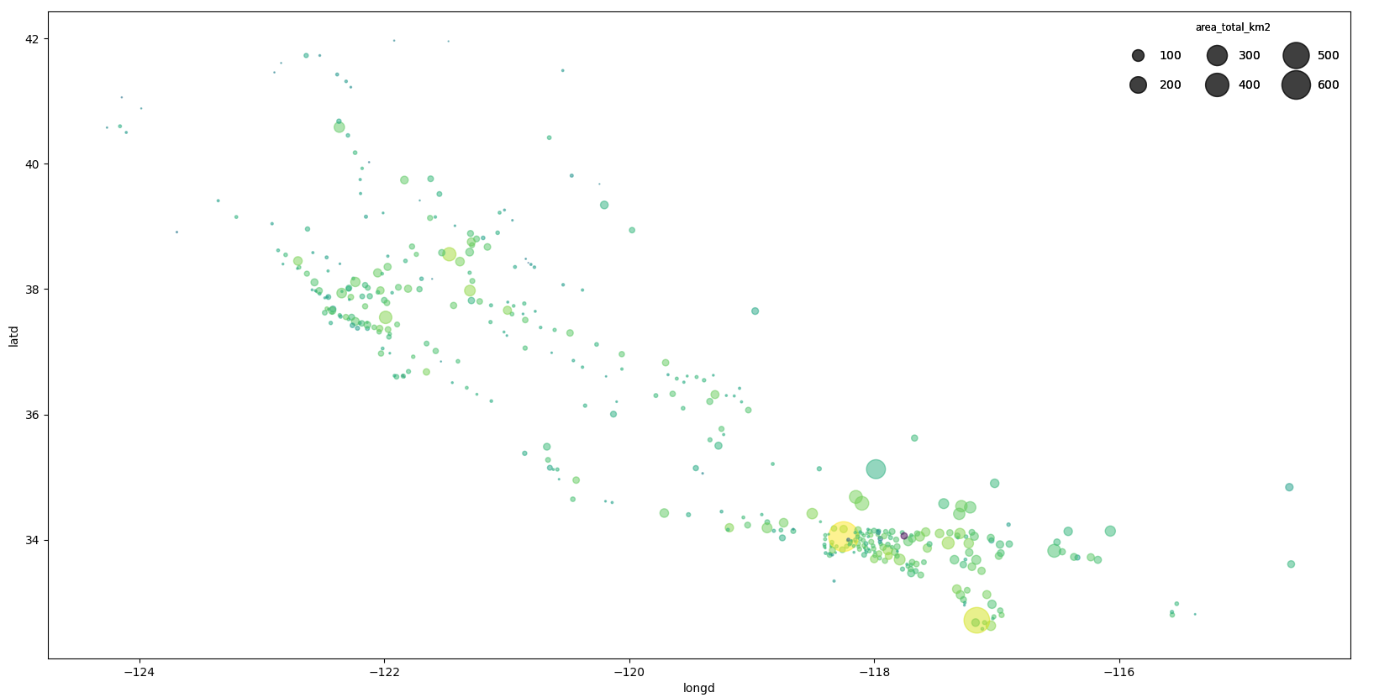

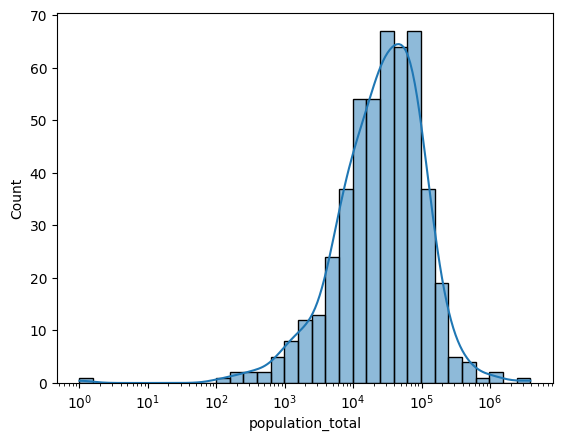

In [64]:
sns.histplot(df["population_total"], kde = True, log_scale = 10);

In [54]:
df["log_poblacion"] = np.log10(df["population_total"])

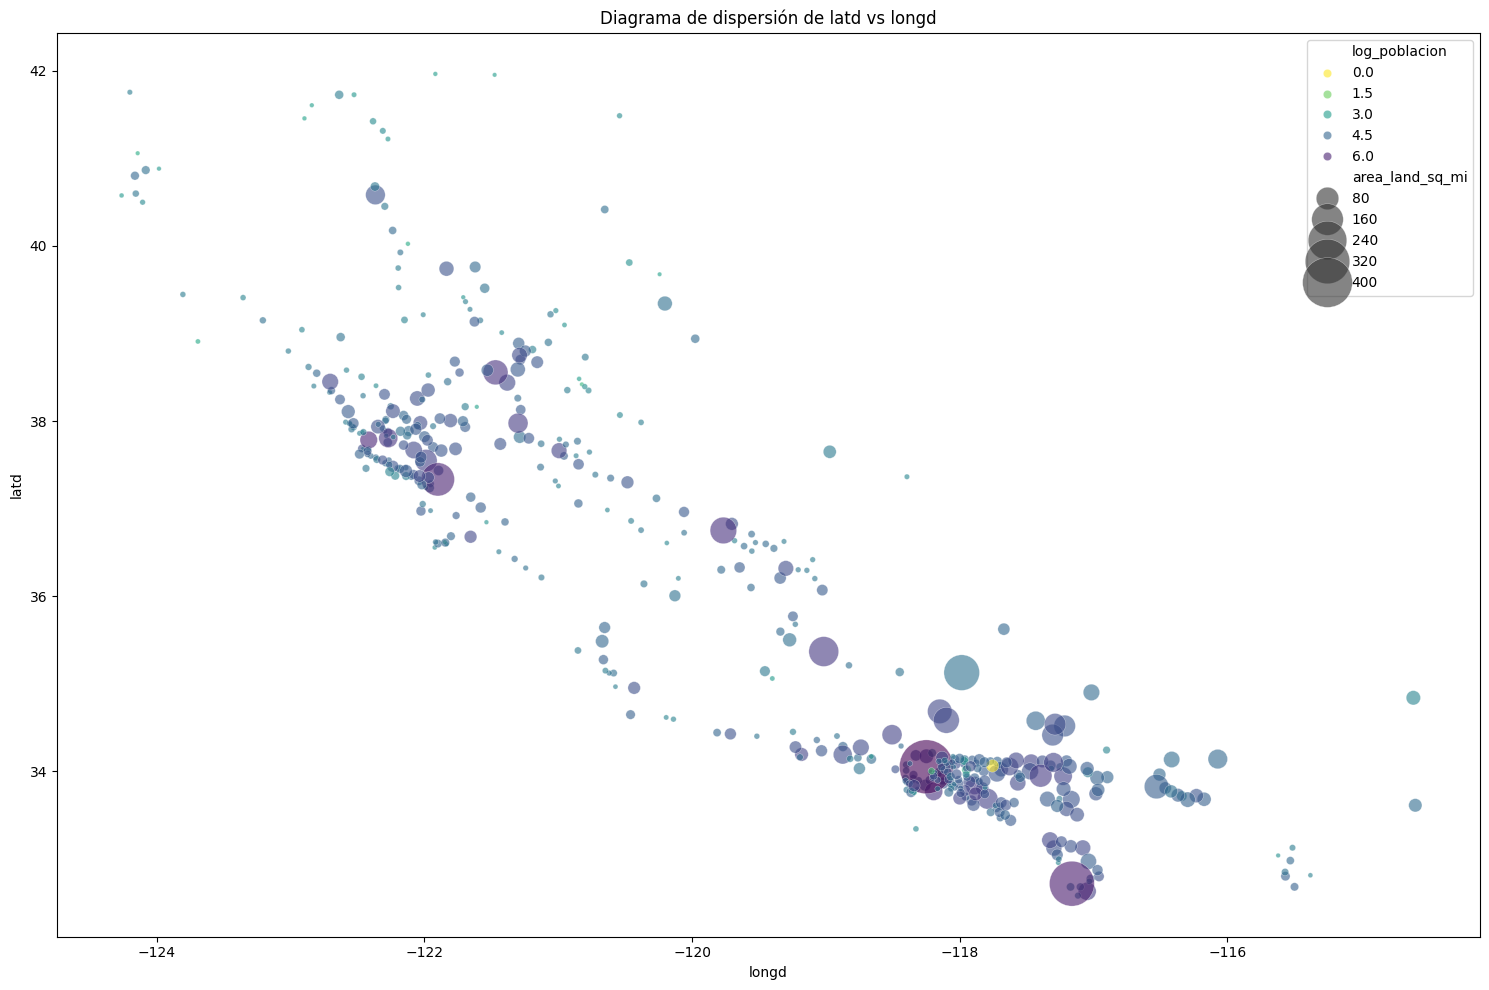

In [81]:
scatter_plot_avanzado(df, "longd", "latd", col_cat = "log_poblacion",
                      tam = 'area_land_sq_mi', usar_colorbar=False)

## #2: Presentación

En esta parte tendrás que hacer dos cosas:

#2.1 Crear una presentación sencilla sobre el Titanic de no más de 6 slides, sin incluir portada, con los siguientes mensajes y su apoyo en datos:  

1. El titanic fue un accidente con una tasa de mortalidad alta.  

2. Los datos apoyan que se dio el "Las mujeres y los niños primero", pero...  
3. ...la clase en la que viajases tuvo una influencia significativa y podría explicar...  
4. ...las diferencias entre tasas de supervivencia de mujeres y niños.    
5. Además, aunque el puerto de embarque parece tener influencia, se podría asumir que más bien fue la clase de pasaje que embarcó en cada uno de ellos.  

#2.2 Las gráficas a emplear en la presentación debes generarlas en un notebook.  

Tienes que entregar ambas cosas: presentación y notebook :)

In [57]:
df_titanic = pd.read_csv("./data/titanic.csv")

Total: 891
Muertos: 549
Mortalidad (%): 61.62


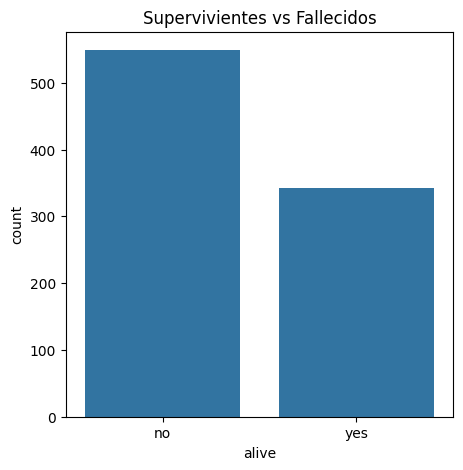

In [58]:
total = len(df_titanic)
muertos = (df_titanic['alive'] == 'no').sum()
vivos = (df_titanic['alive'] == 'yes').sum()
mortalidad = muertos / total * 100

print("Total:", total)
print("Muertos:", muertos)
print("Mortalidad (%):", round(mortalidad,2))

plt.figure(figsize=(5,5))
sns.countplot(x='alive', data=df_titanic)
plt.title("Supervivientes vs Fallecidos")
plt.show()


alive          no        yes
sex                         
female  25.796178  74.203822
male    81.109185  18.890815


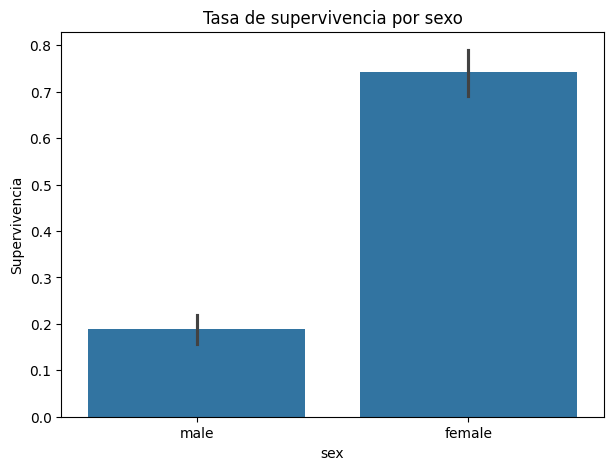

In [59]:
df_titanic['alive_num'] = df_titanic['alive'].map({'yes': 1, 'no': 0})

supervivencia_sex = (
    df_titanic
    .groupby('sex')['alive']
    .value_counts(normalize=True)
    .unstack() * 100 #reorganiza un índice de filas hacia columnas, es decir, transforma una tabla en forma "larga" a una forma "ancha".
)

print(supervivencia_sex)

plt.figure(figsize=(7, 5))
sns.barplot(x='sex', y='alive_num', data=df_titanic)
plt.title("Tasa de supervivencia por sexo")
plt.ylabel("Supervivencia")
plt.show()


alive,no,yes
who,,
child,40.963855,59.036145
man,83.612663,16.387337
woman,24.354244,75.645756


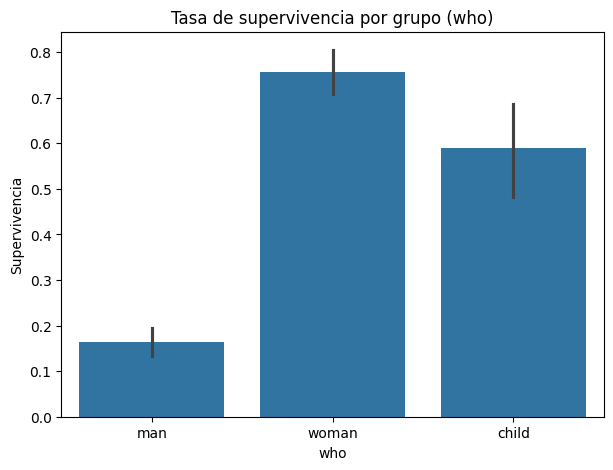

In [60]:
supervivencia_who = (
    df_titanic
    .groupby('who')['alive']
    .value_counts(normalize=True)
    .unstack() * 100
)

display(supervivencia_who)

plt.figure(figsize=(7, 5))
sns.barplot(x='who', y='alive_num', data=df_titanic)
plt.title("Tasa de supervivencia por grupo (who)")
plt.ylabel("Supervivencia")
plt.show()


alive,no,yes
class,,
First,37.037037,62.962963
Second,52.717391,47.282609
Third,75.763747,24.236253


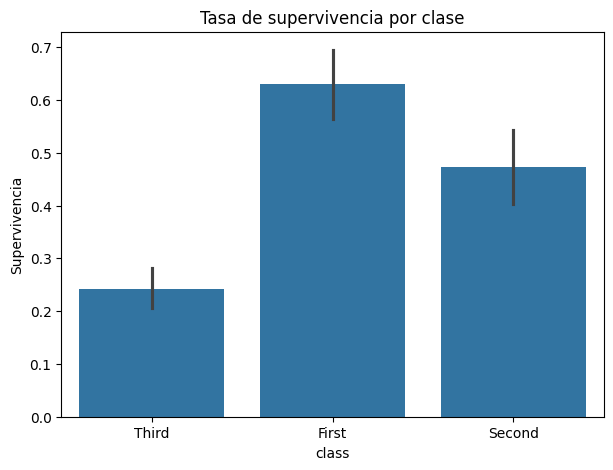

In [61]:
supervivencia_clase = (
    df_titanic
    .groupby('class')['alive']
    .value_counts(normalize=True)
    .unstack() * 100
)

display(supervivencia_clase)

plt.figure(figsize=(7, 5))
sns.barplot(x='class', y='alive_num', data=df_titanic)
plt.title("Tasa de supervivencia por clase")
plt.ylabel("Supervivencia")
plt.show()


alive                no         yes
class  who                         
First  child  16.666667   83.333333
       man    64.705882   35.294118
       woman   2.197802   97.802198
Second child        NaN  100.000000
       man    91.919192    8.080808
       woman   9.090909   90.909091
Third  child  56.896552   43.103448
       man    88.087774   11.912226
       woman  50.877193   49.122807

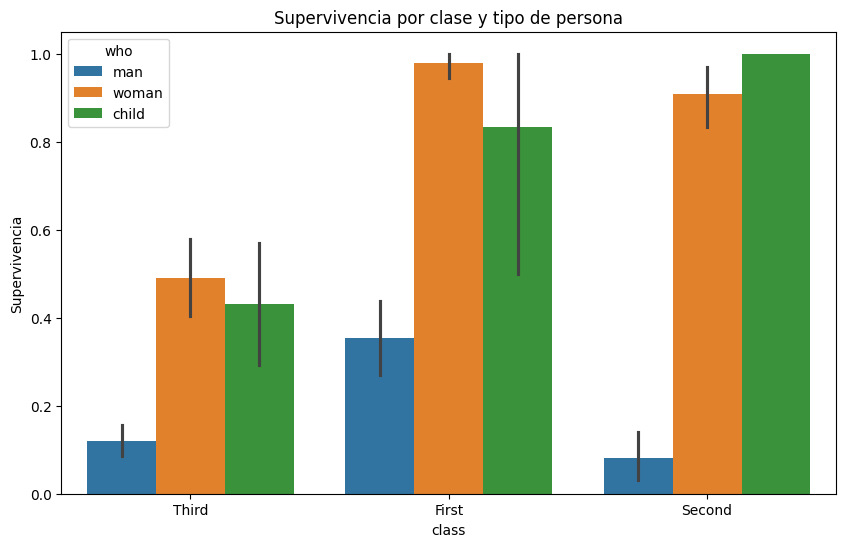

alive,no,yes
embark_town,,
Cherbourg,44.642857,55.357143
Queenstown,61.038961,38.961039
Southampton,66.304348,33.695652


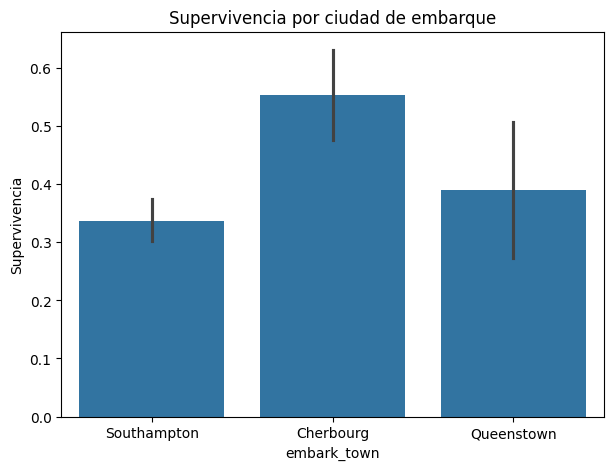

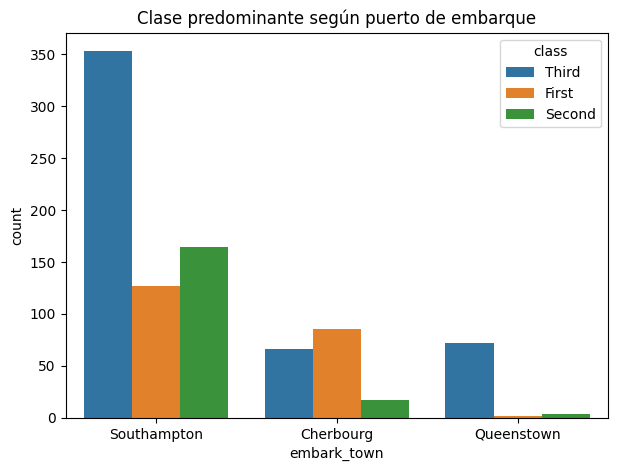

In [62]:
tabla = (
    df_titanic
    .groupby(['class', 'who'])['alive']
    .value_counts(normalize=True)
    .unstack() * 100
)

display(tabla)

plt.figure(figsize=(10, 6))
sns.barplot(x='class', y='alive_num', hue='who', data=df_titanic)
plt.title("Supervivencia por clase y tipo de persona")
plt.ylabel("Supervivencia")
plt.show()

# -----------------------------------------------------------
# Supervivencia por ciudad de embarque
# -----------------------------------------------------------
supervivencia_embarque = (
    df_titanic
    .groupby('embark_town')['alive']
    .value_counts(normalize=True)
    .unstack() * 100
)

display(supervivencia_embarque)

plt.figure(figsize=(7, 5))
sns.barplot(x='embark_town', y='alive_num', data=df_titanic)
plt.title("Supervivencia por ciudad de embarque")
plt.ylabel("Supervivencia")
plt.show()

# -----------------------------------------------------------
# Distribución de clase por puerto
# -----------------------------------------------------------
plt.figure(figsize=(7, 5))
sns.countplot(x='embark_town', hue='class', data=df_titanic)
plt.title("Clase predominante según puerto de embarque")
plt.show()
